# Project Directory Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
for device in devices:
    print(device.name, device.device_type, device.physical_device_desc)

/device:CPU:0 CPU 
/device:GPU:0 GPU device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, compute capability: 8.6


In [ ]:
import sys
import os

project_dir = "/content/drive/MyDrive/Dissertation/Project1"
os.chdir(project_dir)

# Add this directory to Python path
if project_dir not in sys.path:
    sys.path.append(project_dir)


# BraTS 2024 Dataset Analysis

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import PIL
import nibabel as nib

In [ ]:
TRAIN_DATASET_PATH = "/content/drive/MyDrive/Dissertation/BraTS-GoAT/MICCAI2024-BraTS-GoAT-TrainingData-With-GroundTruth/"

# load .nii file as a numpy array
#Check shape and data type of a single modality file.

test_image_flair = nib.load(TRAIN_DATASET_PATH + "BraTS-GoAT-00355/BraTS-GoAT-00355-t2f.nii.gz").get_fdata()
print("Shape: ", test_image_flair.shape)
print("Dtype: ", test_image_flair.dtype)

Shape:  (240, 240, 155)
Dtype:  float64


In [ ]:
## Minimum and Maximum of image
print("Min: ", test_image_flair.min())
print("Max: ", test_image_flair.max())

Min:  0.0
Max:  2292.0


In [ ]:
# Image Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

print("Min: ", test_image_flair.min())
print("Max: ", test_image_flair.max())

Min:  0.0
Max:  1.0


In [ ]:
## Rescaling a single Brain 00355 Patient

# rescaling t1
test_image_t1 = nib.load(TRAIN_DATASET_PATH + 'BraTS-GoAT-00355/BraTS-GoAT-00355-t1n.nii.gz').get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

# rescaling t1ce
test_image_t1ce = nib.load(TRAIN_DATASET_PATH + 'BraTS-GoAT-00355/BraTS-GoAT-00355-t1c.nii.gz').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

# rescaling t2
test_image_t2 = nib.load(TRAIN_DATASET_PATH + 'BraTS-GoAT-00355/BraTS-GoAT-00355-t2w.nii.gz').get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

# we will not rescale the mask
test_image_seg = nib.load(TRAIN_DATASET_PATH + 'BraTS-GoAT-00355/BraTS-GoAT-00355-seg.nii.gz').get_fdata()

Slice Number: 95 out of 155
Brain: 00355


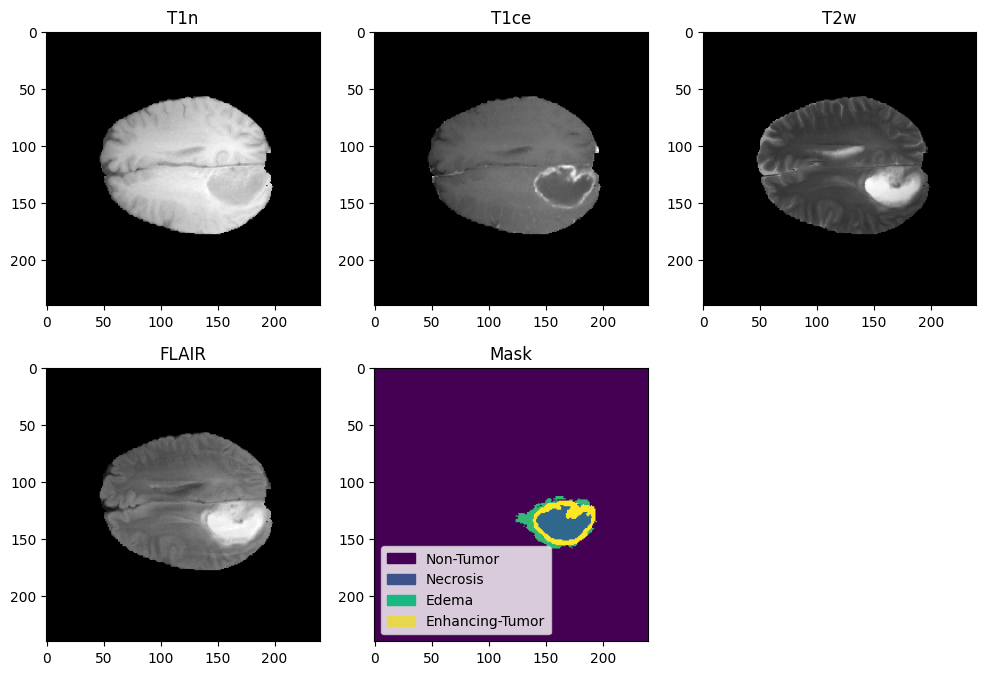

In [ ]:
## Viewing the all modalities image and segmentation mask for Brain 00355

cmap = matplotlib.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = matplotlib.colors.BoundaryNorm([-0.40, 0.40, 0.5, 1.5, 2.5], cmap.N)

slice = 95

print("Slice Number: " + str(slice) + " out of 155")
print("Brain: 00355")

# Define legend
class_names = ['Non-Tumor', 'Necrosis', 'Edema', 'Enhancing-Tumor']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

plt.figure(figsize=(12, 8))

# T1
plt.subplot(2, 3, 1)
plt.imshow(test_image_t1[:,:,slice], cmap='gray')
plt.title('T1n')

# T1ce
plt.subplot(2, 3, 2)
plt.imshow(test_image_t1ce[:,:,slice], cmap='gray')
plt.title('T1ce')

# T2
plt.subplot(2, 3, 3)
plt.imshow(test_image_t2[:,:,slice], cmap='gray')
plt.title('T2w')

# Flair
plt.subplot(2, 3, 4)
plt.imshow(test_image_flair[:,:,slice], cmap='gray')
plt.title('FLAIR')

# Mask
plt.subplot(2, 3, 5)
plt.imshow(test_image_seg[:,:,slice])
plt.title('Mask')
plt.legend(handles=legend, loc='lower left')
plt.show()

In [ ]:
## Original 3D Image Dimensions for each Modality and Segmentation Mask

# Modality shape
print("Modality: ", test_image_t1.shape)

# Segmentation shape
print("Segmentation: ", test_image_seg.shape)

Modality:  (240, 240, 155)
Segmentation:  (240, 240, 155)


### Viewing The Three Brain MRI Planes

Slice number: 95
Brain: 00355


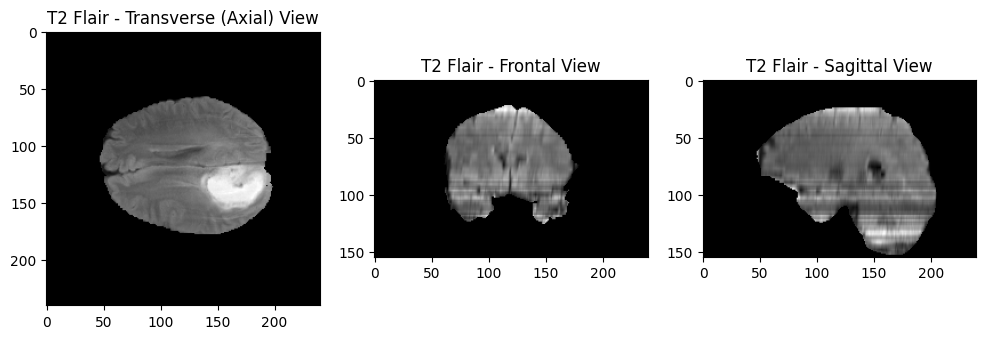

In [ ]:
from skimage.transform import rotate
from skimage.transform import resize

slice = 95

print("Slice number: " + str(slice))
print("Brain: 00355")

plt.figure(figsize=(12, 8))

# Apply a 90° rotation with an automatic resizing, otherwise the display is less obvious to analyze
# T2 Flair - Transverse View
plt.subplot(1, 3, 1)
plt.imshow(test_image_flair[:,:,slice], cmap='grey')
plt.title('T2 Flair - Transverse (Axial) View')

# T2 Flair - Frontal View
plt.subplot(1, 3, 2)
plt.imshow(rotate(test_image_flair[:,slice,:], 90, resize=True), cmap='grey')
plt.title('T2 Flair - Frontal View')

# T2 Flair - Sagittal View
plt.subplot(1, 3, 3)
plt.imshow(rotate(test_image_flair[slice,:,:], 90, resize=True), cmap='grey')
plt.title('T2 Flair - Sagittal View')
plt.show()

### Visualizing Multi-Class Segmentation with Isolated Class Labels

Brain: 00355


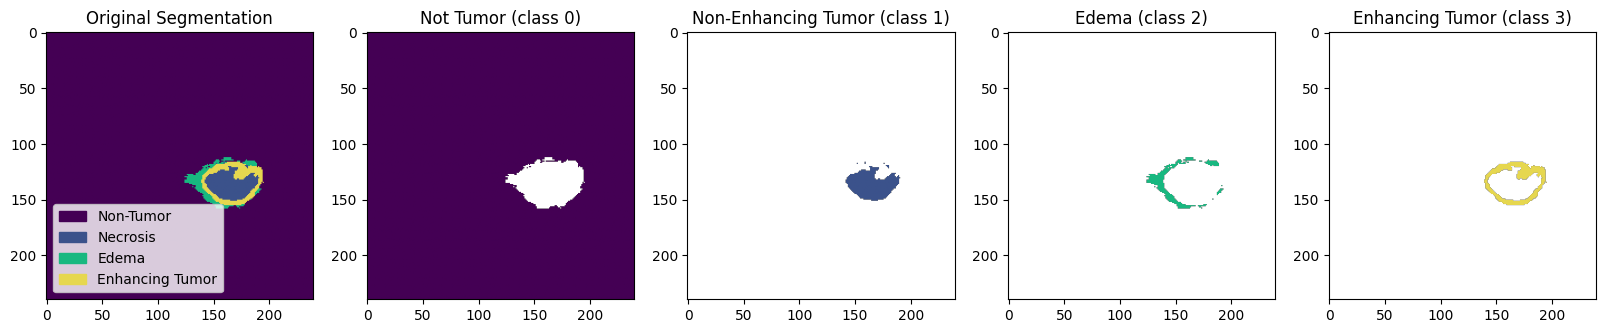

In [ ]:
cmap = matplotlib.colors.ListedColormap(['#440054', '#3b528b', '#18b880', '#e6d74f'])
norm = matplotlib.colors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap.N)

print("Brain: 00355")

# Isolation of class 0
seg_0 = test_image_seg.copy()
seg_0[seg_0 != 0] = np.nan

# Isolation of class 1
seg_1 = test_image_seg.copy()
seg_1[seg_1 != 1] = np.nan

# Isolation of class 2
seg_2 = test_image_seg.copy()
seg_2[seg_2 != 2] = np.nan

# Isolation of class 3
seg_3 = test_image_seg.copy()
seg_3[seg_3 != 3] = np.nan

# Define legend
class_names = ['Non-Tumor', 'Necrosis', 'Edema', 'Enhancing Tumor']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, ax = plt.subplots(1, 5, figsize=(20, 20))

ax[0].imshow(test_image_seg[:,:, slice], cmap=cmap, norm=norm)
ax[0].set_title('Original Segmentation')
ax[0].legend(handles=legend, loc='lower left')

ax[1].imshow(seg_0[:,:, slice], cmap=cmap, norm=norm)
ax[1].set_title('Not Tumor (class 0)')

ax[2].imshow(seg_1[:,:, slice], cmap=cmap, norm=norm)
ax[2].set_title('Non-Enhancing Tumor (class 1)')

ax[3].imshow(seg_2[:,:, slice], cmap=cmap, norm=norm)
ax[3].set_title('Edema (class 2)')

ax[4].imshow(seg_3[:,:, slice], cmap=cmap, norm=norm)
ax[4].set_title('Enhancing Tumor (class 3)')

plt.show()

### Ingesting the Data and Creating Data Splits

In [ ]:
# Rerun with correct config
from prepare_data import create_table
from config import cfg

create_table(
    dataset_glob=cfg['data_dir'],
    table_data_shape=cfg['table_data_shape'],
    save_dir=cfg['save_data_dir'],
    crop_coordinates=cfg['crop_coord'],
    data_channels=cfg['data_channels'],
    val_frac=cfg.get('val_frac', 0.15),
    test_frac=cfg.get('test_frac', 0.15),
    seed=cfg.get('seed', 100)
)


ingest: 100%|██████████| 1351/1351 [27:02<00:00,  1.20s/it]


Split => train:945  val:203  test:203


### Defining the Data Generator

In [ ]:
import numpy as np
from config import cfg
import h5py
from data_generator import CustomDataGenerator

# Load split indices
train_idx = np.load(cfg['train_idx'])
val_idx   = np.load(cfg['val_idx'])

#  Open HDF5 file
hdf5_file = h5py.File(cfg['hdf5_dir'], 'r')

    #  Create fresh generators
train_gen = CustomDataGenerator(
        hdf5_file=hdf5_file,
        brain_idx=train_idx.tolist(),
        batch_size=cfg['batch_size'],
        view=cfg['view'],
        mode='train',
        horizontal_flip=cfg['hor_flip'],
        vertical_flip=cfg['ver_flip'],
        rotation_range=cfg['rotation_range'],
        zoom_range=cfg['zoom_range'],
        bg_max_frac=0.15,
        shuffle=True,
        seed=cfg['seed']
    )

val_gen = CustomDataGenerator(
        hdf5_file=hdf5_file,
        brain_idx=val_idx.tolist(),
        batch_size=cfg['val_batch_size'],
        view=cfg['view'],
        mode='validation',
        horizontal_flip=False,
        vertical_flip=False,
        rotation_range=0.0,
        zoom_range=0.0,
        shuffle=False
    )

[DataGen] mode=train | brains=945 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=8901
[DataGen] mode=validation | brains=203 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=1624


## Training Data Shape

In [ ]:
x, y = train_gen[2]
print("x:", x.shape)   # Expect (B, H, W, 4)
print("y:", y.shape)   # Expect (B, H, W, 4)

# Check unique values after decoding
y_decoded = np.argmax(y[0], axis=-1)
print(np.unique(y_decoded))  # Expect [0, 1, 2, 3] (labels)


x: (8, 144, 144, 4)
y: (8, 144, 144, 4)
[0 1 2 3]


## Validation Data Shape

In [ ]:
x, y = val_gen[5]
print("x:", x.shape)   # Expect (batch_size, H, W, 4)
print("y:", y.shape)   # Expect (batch_size, H, W, 4)

# Check unique values after decoding
y_decoded = np.argmax(y[0], axis=-1)
print(np.unique(y_decoded))  # Expect [0, 1, 2, 3] (labels)


x: (16, 144, 144, 4)
y: (16, 144, 144, 4)
[0 1 2 3]


## Viewing the Input Image Modalities along with Ground Truth Mask

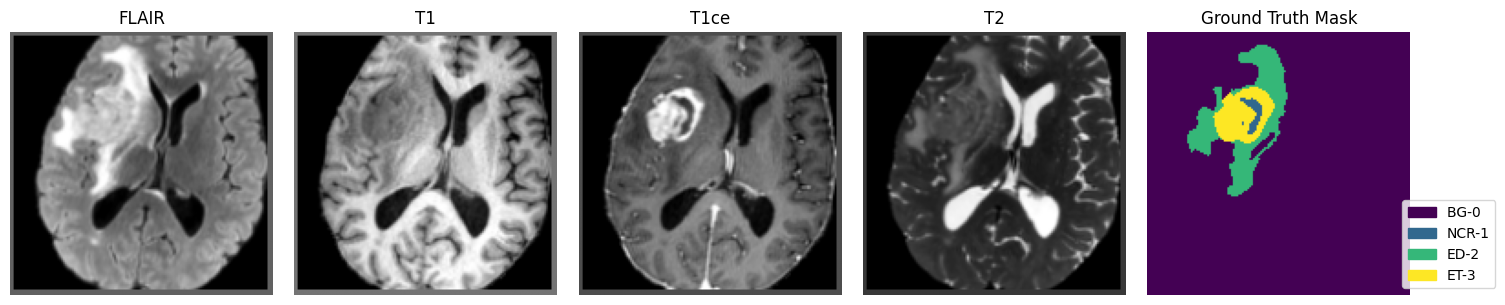

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Get a batch
x, y = train_gen[5]

# Pick one slice from the batch
idx = 6
img = x[idx]   # shape: (H, W, 4)
mask_one_hot = y[idx]  # shape: (H, W)
mask = np.argmax(mask_one_hot, axis=-1)  # shape: (H, W), values in [0, 1, 2, 3]

# Show all 4 MRI modalities + label mask
modalities = ['FLAIR', 'T1', 'T1ce', 'T2']
class_labels = {0: 'BG-0 ', 1: 'NCR-1', 2: 'ED-2', 3: 'ET-3'}
colors = plt.cm.viridis(np.linspace(0, 1, 4))  # colormap used in imshow

plt.figure(figsize=(15, 3))
for i in range(4):
    plt.subplot(1, 5, i+1)
    plt.imshow(img[..., i], cmap='gray')
    plt.title(modalities[i])
    plt.axis('off')

# Show segmentation label
plt.subplot(1, 5, 5)
plt.imshow(mask, cmap='viridis', vmin=0, vmax=3)
plt.title('Ground Truth Mask')
plt.axis('off')

# Create manual legend
legend_elements = [
    mpatches.Patch(color=colors[i], label=class_labels[i])
    for i in class_labels
]
plt.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.35, 0))

plt.tight_layout()
plt.show()


In [ ]:
mask = np.argmax(y[0], axis=-1)
for c in range(4):
    print(f"Class {c}: {(mask == c).sum()} voxels")


Class 0: 19335 voxels
Class 1: 282 voxels
Class 2: 570 voxels
Class 3: 549 voxels


# Model Training Using Attention Guided Version of 2D U-Net

### Loading the Training and Validation Data Generator

In [ ]:
from config import cfg
from data_generator import CustomDataGenerator
import h5py
h5 = h5py.File(cfg['hdf5_dir'], 'r')

train_gen = CustomDataGenerator(
    hdf5_file=h5,  #  pass open file
    brain_idx=train_idx.tolist(),
    batch_size=cfg['batch_size'],
    view=cfg['view'],
    mode='train',
    horizontal_flip=cfg['hor_flip'],
    vertical_flip=cfg['ver_flip'],
    rotation_range=cfg['rotation_range'],
    zoom_range=cfg['zoom_range'],
    bg_max_frac=0.15,
    shuffle=True,
    seed=cfg['seed']
)
val_gen = CustomDataGenerator(
    hdf5_file=h5,
    brain_idx=val_idx.tolist(),
    batch_size=cfg['val_batch_size'],
    view=cfg['view'],
    mode='validation',
    horizontal_flip=False,
    vertical_flip=False,
    rotation_range=0.0,
    zoom_range=0.0,
    shuffle=False
)


# Test slice
x, y = train_gen[0]
print("X shape:", x.shape)
print("Y shape:", y.shape)

#  Only close after you're done
h5.close()


[DataGen] mode=train | brains=945 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=8901
[DataGen] mode=validation | brains=203 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=1624
X shape: (8, 144, 144, 4)
Y shape: (8, 144, 144, 4)


### Attention-Guided Version of 2D UNet Model Training

In [ ]:
import os
import h5py
import numpy as np
from config import cfg
from model import unet_model
from data_generator import CustomDataGenerator
from loss import custom_loss, dice_coef, mean_iou, dice_per_class
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import (
    CSVLogger, ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
)

def train_model():
    # Load split indices
    train_idx = np.load(cfg['train_idx'])
    val_idx   = np.load(cfg['val_idx'])

    # Open HDF5 file
    hdf5_file = h5py.File(cfg['hdf5_dir'], 'r')

    # Data Generators
    train_gen = CustomDataGenerator(
        hdf5_file=hdf5_file,
        brain_idx=train_idx.tolist(),
        batch_size=cfg['batch_size'],
        view=cfg['view'],
        mode='train',
        horizontal_flip=cfg['hor_flip'],
        vertical_flip=cfg['ver_flip'],
        rotation_range=cfg['rotation_range'],
        zoom_range=cfg['zoom_range'],
        bg_max_frac=0.15,
        shuffle=True,
        seed=cfg['seed']
    )

    val_gen = CustomDataGenerator(
        hdf5_file=hdf5_file,
        brain_idx=val_idx.tolist(),
        batch_size=cfg['val_batch_size'],
        view=cfg['view'],
        mode='validation',
        shuffle=False
    )

    # Callbacks
    model_dir = os.path.join(cfg['save_dir'], f"{cfg['view']}_run")
    os.makedirs(model_dir, exist_ok=True)

    callbacks = [
        CSVLogger(os.path.join(model_dir, 'log.csv')),
        ModelCheckpoint(
            filepath=os.path.join(model_dir, 'best_model.keras'),
            monitor='val_loss',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-5,
            verbose=1
        ),
        TensorBoard(log_dir=os.path.join(model_dir, 'tensorboard'))
    ]

    # Build model
    input_shape = train_gen.data_shape[1:]  # (H, W, C)
    model = unet_model(
        input_shape=input_shape,
        modified_unet=cfg['modified_unet'],
        learning_rate=cfg['lr'],
        start_channel=cfg['start_chs'],
        number_of_levels=cfg['levels'],
        output_channels=4
        # saved_model_dir=cfg['load_model_dir']
    )

    model.compile(
        optimizer=SGD(learning_rate=cfg['lr'], momentum=0.9),
        loss=custom_loss,
        metrics=[
            dice_coef,
            mean_iou,
            dice_per_class(1, "NCR"),
            dice_per_class(2, "ED"),
            dice_per_class(3, "ET")

        ]
    )

    # Debug info
    print("train_gen type:", type(train_gen))
    print("val_gen type:", type(val_gen))
    x, y = val_gen[0]
    print("Validation batch shape:", x.shape, y.shape)
    print("val_gen len:", len(val_gen))

    # Train model
    model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=cfg['epochs'],
        # steps_per_epoch=1000,          # ⬅️ Reduced
        # validation_steps=200,
        callbacks=callbacks,
        use_multiprocessing=False,
        workers=1
    )

    hdf5_file.close()


In [ ]:

train_model()

[DataGen] mode=train | brains=945 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=8901
[DataGen] mode=validation | brains=203 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=1624
The modified UNet was built!
train_gen type: <class 'data_generator.CustomDataGenerator'>
val_gen type: <class 'data_generator.CustomDataGenerator'>
Validation batch shape: (16, 144, 144, 4) (16, 144, 144, 4)
val_gen len: 1624
Epoch 1/100
8901/8901 [==============================] - ETA: 0s - loss: 0.4073 - dice_coef: 0.7170 - mean_iou: 0.5895 - dice_NCR: 0.6260 - dice_ED: 0.7407 - dice_ET: 0.7844
Epoch 1: val_loss improved from inf to 0.81596, saving model to C:\Shayan\Project1\save\axial_run\best_model.keras
8901/8901 [==============================] - 2773s 310ms/step - loss: 0.4073 - dice_coef: 0.7170 - mean_iou: 0.5895 - dice_NCR: 0.6260 - dice_ED: 0.7407 - dice_ET: 0.7844 - val_loss: 0.8160 - val_dice_coef: 0.7034 - val_mean_iou: 0.6594 - val_dice_NCR: 0.8398 -

## Attention U-Net Model Architecture

In [ ]:
from model import unet_model

input_shape = train_gen.data_shape[1:]

model = unet_model(
        input_shape=input_shape,
        modified_unet=cfg['modified_unet'],
        learning_rate=cfg['lr'],
        start_channel=cfg['start_chs'],
        number_of_levels=cfg['levels'],
        output_channels=4
        # saved_model_dir=cfg['load_model_dir']
    )
model.summary()



The modified UNet was built!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ the_input_layer     │ (None, 144, 144,  │          0 │ -                 │
│ (InputLayer)        │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gaussian_Noise      │ (None, 144, 144,  │          0 │ the_input_layer[… │
│ (GaussianNoise)     │ 4)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 144, 144,  │        544 │ Gaussian_Noise[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 144, 144,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu (PReLU)     │ (None, 144, 144,  │         32 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 144, 144,  │      9,248 │ p_re_lu[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 144, 144,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_1 (PReLU)   │ (None, 144, 144,  │         32 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 144, 144,  │      9,248 │ p_re_lu_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 144, 144,  │          0 │ conv2d[0][0],     │
│                     │ 32)               │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 72, 72,    │      8,256 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_2 (PReLU)   │ (None, 72, 72,    │         64 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 72, 72,    │     36,928 │ p_re_lu_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_re_lu_3 (PReLU)   │ (None, 72, 72,    │         64 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 72, 72,    │     36,928 │ p_re_lu_3[0][0] 

 Total params: 2,566,980 (9.79 MB)

 Trainable params: 2,563,652 (9.78 MB)

 Non-trainable params: 3,328 (13.00 KB)

## Model Loading with Best Saved Weights

In [ ]:
import numpy as np
import h5py
from config import cfg
from data_generator import CustomDataGenerator
from model import unet_model

# Load test indices
test_idx = np.load(cfg['test_idx'])

# Open the HDF5 file
h5_file = h5py.File(cfg['hdf5_dir'], 'r')

# Create test generator
test_gen = CustomDataGenerator(
    hdf5_file=h5_file,
    brain_idx=test_idx.tolist(),
    batch_size=32,
    view=cfg['view'],
    mode='test',  # or 'test' if implemented
    shuffle=False
)

# Load trained model
input_shape = test_gen.data_shape[1:]
model = unet_model(
    input_shape=input_shape,
    modified_unet=cfg['modified_unet'],
    learning_rate=cfg['lr'],
    start_channel=cfg['start_chs'],
    number_of_levels=cfg['levels'],
    output_channels=4,
    saved_model_dir=cfg['save_dir'] + f"/{cfg['view']}_run/best_model.h5"
)


[DataGen] mode=test | brains=203 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=812
Loading model weights from: /content/drive/MyDrive/Dissertation/Project1/save/axial_run/best_model.h5
The modified UNet was built!


In [ ]:
import numpy as np
import h5py
from config import cfg
from data_generator import CustomDataGenerator
from model import unet_model

# Load test indices
test_idx = np.load(cfg['test_idx'])

# Open the HDF5 file
h5_file = h5py.File(cfg['hdf5_dir'], 'r')

# Create test generator
test_gen = CustomDataGenerator(
    hdf5_file=h5_file,
    brain_idx=test_idx.tolist(),
    batch_size=16,
    view=cfg['view'],
    mode='test',
    shuffle=False
)

# Build the same model architecture
input_shape = test_gen.data_shape[1:]
model = unet_model(
    input_shape=input_shape,
    modified_unet=cfg['modified_unet'],
    learning_rate=cfg['lr'],
    start_channel=cfg['start_chs'],
    number_of_levels=cfg['levels'],
    output_channels=4
)

# Load the weights
model.load_weights("/content/drive/MyDrive/Dissertation/Project1/save4/axial_run/best_model.h5")


print("Model weights loaded successfully!")


[DataGen] mode=test | brains=203 | slices/brain=128 | slice_shape=144x144x4 | view=axial | steps/epoch=1624
The modified UNet was built!
Model weights loaded successfully!


## Evaluating Dice Similarity Coefficient (DSC) and Mean Intersection over Unioun (IoU) on Test Dataset

In [ ]:
import numpy as np
from tqdm import tqdm

# Dice and IoU helpers
def dice_score(y_true, y_pred, cls):
    y_true_c = (y_true == cls).astype(np.uint8)
    y_pred_c = (y_pred == cls).astype(np.uint8)
    inter = np.sum(y_true_c * y_pred_c)
    denom = np.sum(y_true_c) + np.sum(y_pred_c)
    return (2.0 * inter + 1e-7) / (denom + 1e-7)

def iou_score(y_true, y_pred, cls):
    y_true_c = (y_true == cls).astype(np.uint8)
    y_pred_c = (y_pred == cls).astype(np.uint8)
    inter = np.sum(y_true_c * y_pred_c)
    union = np.sum((y_true_c + y_pred_c) > 0)
    return (inter + 1e-7) / (union + 1e-7)

# Metrics storage
dice_scores = {1: [], 2: [], 3: []}
iou_scores  = {1: [], 2: [], 3: []}

# Loop over test generator
for X, Y in tqdm(test_gen, total=len(test_gen)):
    preds = model.predict(X, verbose=0)       # (batch, H, W, 4)
    preds = np.argmax(preds, axis=-1)         # (batch, H, W)
    trues = np.argmax(Y, axis=-1)             # (batch, H, W)

    for cls in [1, 2, 3]:  # NCR, ED, ET
        d = dice_score(trues, preds, cls)
        i = iou_score(trues, preds, cls)
        dice_scores[cls].append(d)
        iou_scores[cls].append(i)

# ---- Final Results ----
for cls, name in zip([1, 2, 3], ["NCR", "ED", "ET"]):
    print(f"{name}: Dice={np.mean(dice_scores[cls]):.4f}, IoU={np.mean(iou_scores[cls]):.4f}")

print("Mean Dice (1–3):", np.mean([np.mean(dice_scores[c]) for c in [1,2,3]]))
print("Mean IoU  (1–3):", np.mean([np.mean(iou_scores[c]) for c in [1,2,3]]))

100%|██████████| 1624/1624 [12:33<00:00,  2.16it/s]

NCR: Dice=0.8548, IoU=0.8237
ED: Dice=0.6566, IoU=0.5971
ET: Dice=0.8217, IoU=0.7839
Mean Dice (1–3): 0.7776965178343448
Mean IoU  (1–3): 0.7348826227832165


### Comparative Analysis of Evaluation Metrics

,Class,Dice,IoU
0,NCR,0.8548,0.8237
1,ED,0.6566,0.5971
2,ET,0.8217,0.7839
3,Mean,0.7777,0.7349


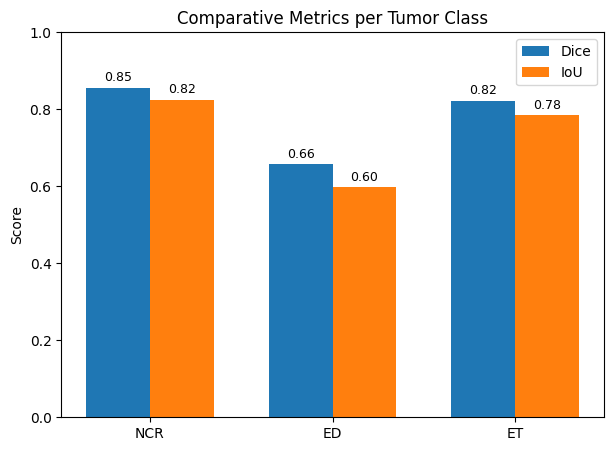

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Results ----
results = {
    "Class": ["NCR", "ED", "ET", "Mean"],
    "Dice": [0.8548, 0.6566, 0.8217, (0.8548+0.6566+0.8217)/3],
    "IoU":  [0.8237, 0.5971, 0.7839, (0.8237+0.5971+0.7839)/3]
}

df = pd.DataFrame(results)
display(df.style.format({"Dice": "{:.4f}", "IoU": "{:.4f}"}))

# ---- Bar chart with values ----
x = range(len(df)-1)  # exclude "Mean" row
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
bars1 = ax.bar([i - width/2 for i in x], df["Dice"][:-1], width=width, label="Dice")
bars2 = ax.bar([i + width/2 for i in x], df["IoU"][:-1], width=width, label="IoU")

# Annotate bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=9)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df["Class"][:-1])
ax.set_ylabel("Score")
ax.set_title("Comparative Metrics per Tumor Class")
ax.set_ylim(0, 1)
ax.legend()
plt.show()


# Qualitative Analysis of Brain Tumor Segmentation on Test Patients

## Side-by-side Brain Tumor Prediction Mask with Ground Truth Mask

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# BraTS colormap (RGB only)
brats_rgb = {
    0: (0, 0, 0),      # Background - black
    1: (255, 255, 0),  # NCR - yellow
    2: (0, 255, 0),    # ED - green
    3: (255, 0, 0)     # ET - red
}

def mask_to_rgb(mask):
    """Convert [H,W] mask with {0,1,2,3} to RGB image."""
    h, w = mask.shape
    rgb = np.zeros((h, w, 3), dtype=np.uint8)
    for k, color in brats_rgb.items():
        rgb[mask == k] = color
    return rgb

def dice_iou_per_class(gt_mask, pred_mask, cls):
    y_true = (gt_mask == cls).astype(np.uint8)
    y_pred = (pred_mask == cls).astype(np.uint8)

    if np.sum(y_true) == 0:  # class absent in GT
        return None, None

    inter = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    dice = (2*inter + 1e-7) / (union + 1e-7)
    iou  = (inter + 1e-7) / (np.sum((y_true + y_pred) > 0) + 1e-7)
    return dice, iou

def normalize_like_generator(slice_2d):
    """Same per-slice z-score normalization with percentile clipping as in CustomDataGenerator."""
    out = np.empty_like(slice_2d, dtype=np.float32)
    for c in range(slice_2d.shape[-1]):
        chan = slice_2d[..., c].astype(np.float32)
        nz = chan[np.nonzero(chan)]
        if nz.size < 16:
            p1, p99 = np.percentile(chan, 1), np.percentile(chan, 99)
            mean, std = 0.0, 1.0
        else:
            p1, p99 = np.percentile(nz, 1), np.percentile(nz, 99)
            chan = np.clip(chan, p1, p99)
            nz = chan[np.nonzero(chan)]
            mean = float(np.mean(nz)) if nz.size > 0 else float(np.mean(chan))
            std = float(np.std(nz)) if nz.size > 1 else 1.0
        if std == 0: std = 1.0
        out[..., c] = (chan - mean) / std
    return out

def visualize_unique_patients(h5_file, test_idx, model, n_patients=3):
    """
    Visualize Flair, T1ce, Ground Truth, Prediction for unique patients.
    Each row = one patient, with Patient ID + metrics at top-left.
    """
    brain_names = [name.decode("utf-8") for name in h5_file["brain_names"][:]]
    shown = 0

    for pid in test_idx:
        vol = h5_file["data"][pid]   # [X,Y,Z,C]
        gt  = h5_file["truth"][pid]  # [X,Y,Z]
        patient_name = brain_names[pid]

        # Pick slice with max tumor
        tumor_sums = np.sum(gt > 0, axis=(0,1))
        slice_idx = np.argmax(tumor_sums)

        flair = vol[:,:,slice_idx,0]
        t1ce  = vol[:,:,slice_idx,2]
        gt_mask = gt[:,:,slice_idx]

        # Prepare input
        inp = vol[:,:,slice_idx,:]
        inp = normalize_like_generator(inp)  # use same norm as generator

        # Predict
        pred = model.predict(np.expand_dims(inp,0), verbose=0)
        pred_mask = np.argmax(pred[0], axis=-1)

        # Normalize MRI for display
        flair_disp = np.rot90((flair - flair.min())/(flair.max()-flair.min()+1e-8), k=3)
        t1ce_disp  = np.rot90((t1ce  - t1ce.min()) /(t1ce.max()-t1ce.min() +1e-8), k=3)

        # Convert masks to RGB
        gt_rgb   = np.rot90(mask_to_rgb(gt_mask), k=3)
        pred_rgb = np.rot90(mask_to_rgb(pred_mask), k=3)

        # ---- Metrics ----
        metrics_parts = []
        for cls,name in zip([1,2,3],["NCR","ED","ET"]):
            d,i = dice_iou_per_class(gt_mask, pred_mask, cls)
            if d is None:  # absent in GT
                metrics_parts.append(f"{name}: N/A")
            else:
                metrics_parts.append(f"{name}: Dice={d:.3f}, IoU={i:.3f}")

        metrics_line = " | ".join(metrics_parts)

        ## Adding tumor class legend
        legend_elements = [
            mpatches.Patch(color='yellow', label='NCR'),
            mpatches.Patch(color='green',  label='ED'),
            mpatches.Patch(color='red',    label='ET'),
            mpatches.Patch(color='black',  label='Background')
        ]



        # ---- Plot row ----
        fig, axs = plt.subplots(1,4, figsize=(12,4))
        axs[0].imshow(flair_disp, cmap="gray"); axs[0].set_title("FLAIR")
        axs[1].imshow(t1ce_disp, cmap="gray");  axs[1].set_title("T1ce")
        axs[2].imshow(gt_rgb); axs[2].set_title("Ground Truth")
        axs[3].imshow(pred_rgb); axs[3].set_title("Prediction")

        for a in axs: a.axis("off")

        # Add patient ID + metrics at top-left of the row
        title_text = f"Patient: {patient_name} | {metrics_line}"
        fig.text(0.01, 0.95, title_text, ha="left", va="top", fontsize=9)
        fig.legend(handles=legend_elements, loc='lower center', ncol=4, frameon=False)

        plt.tight_layout(pad=2.0)
        plt.show()

        shown += 1
        if shown >= n_patients:
            break


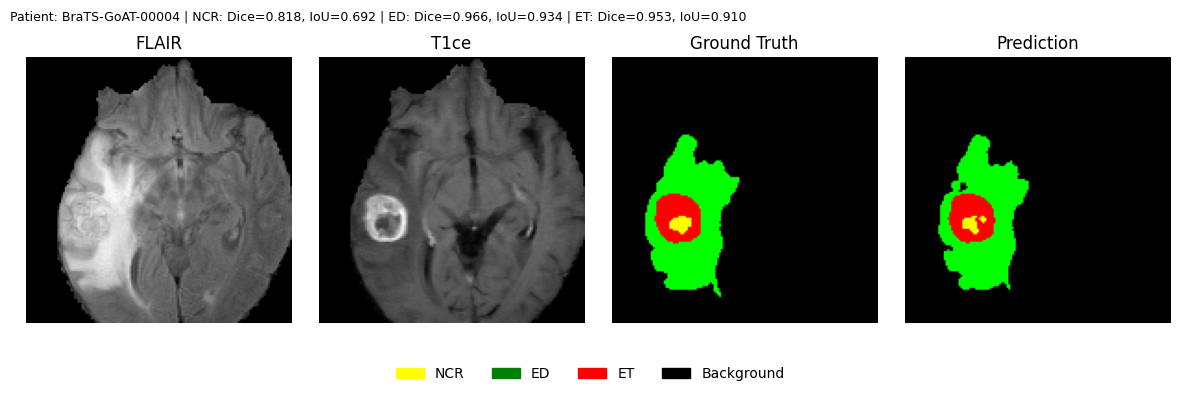

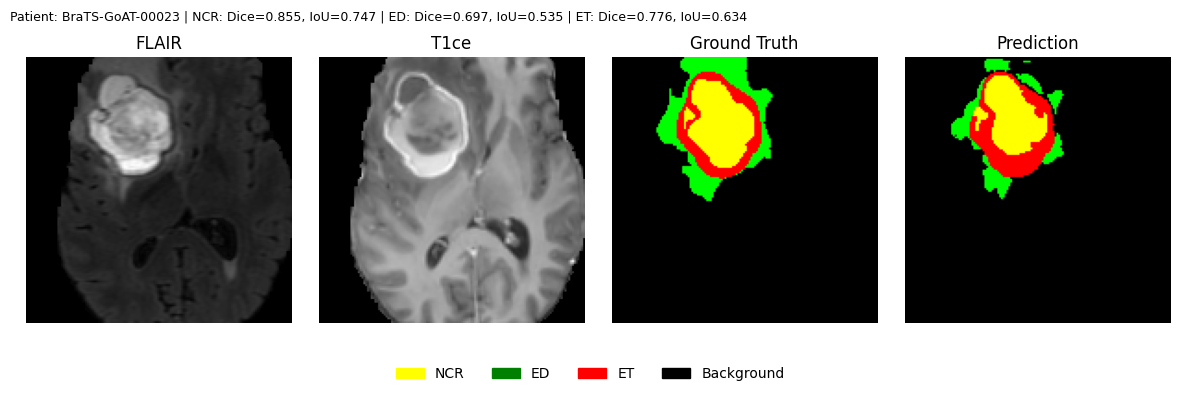

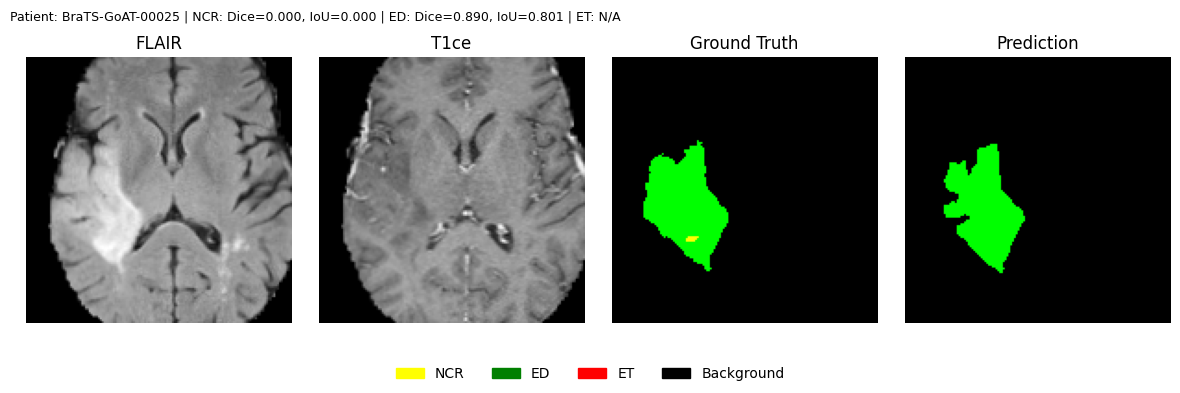

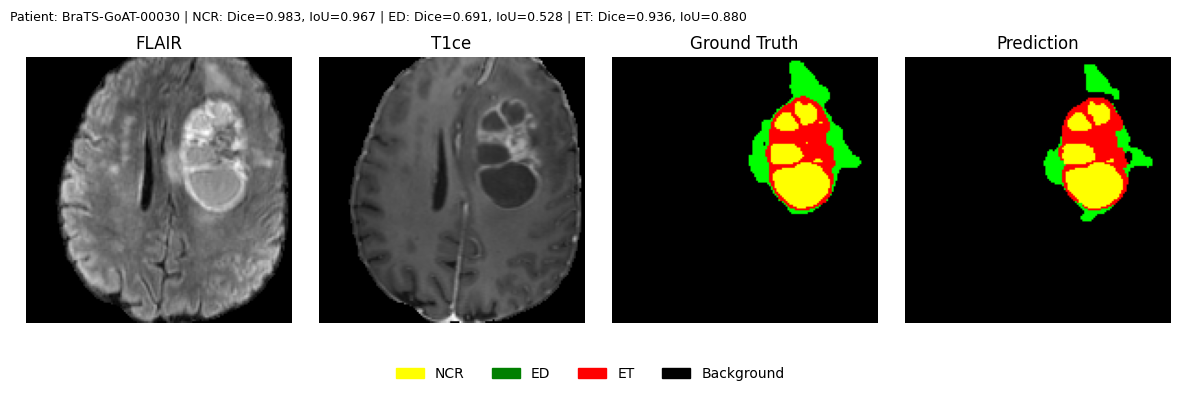

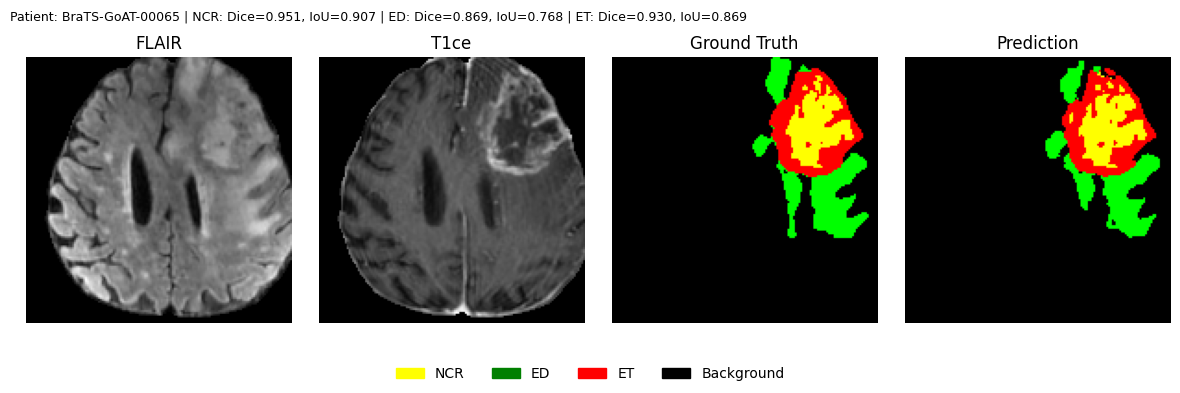

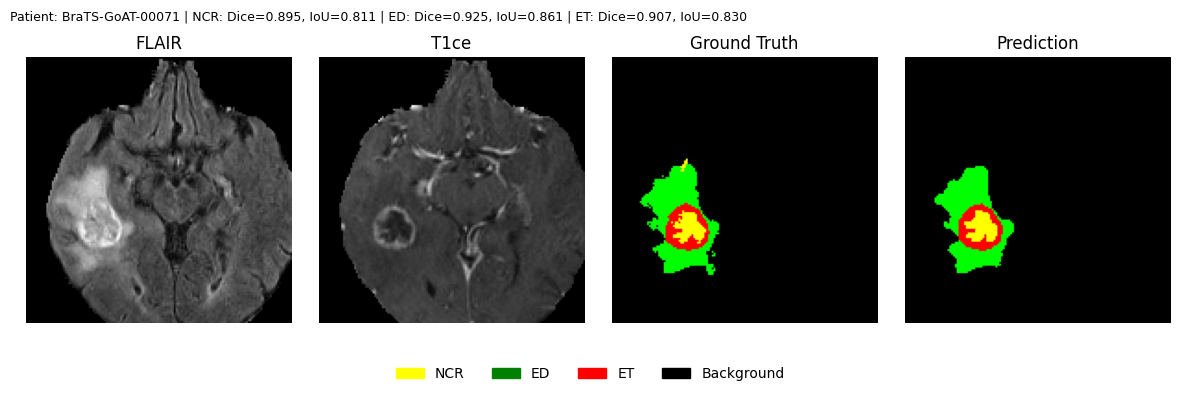

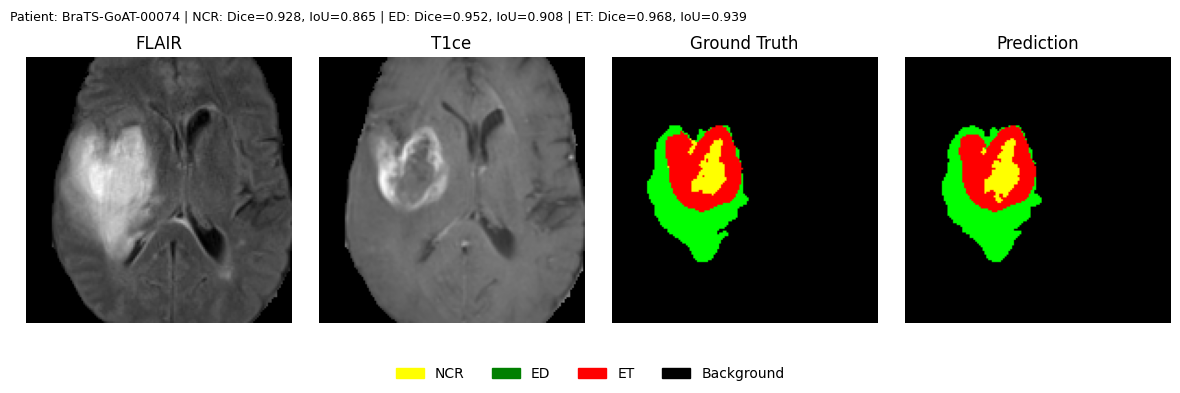

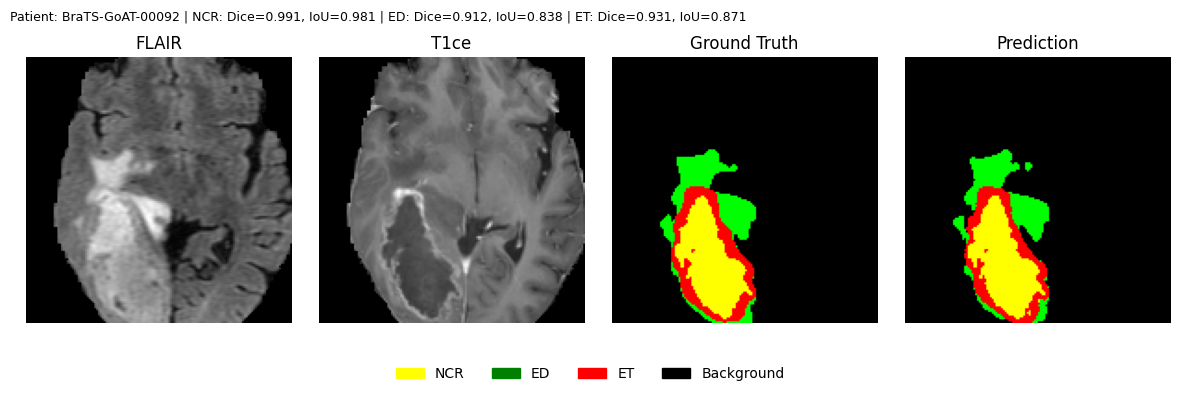

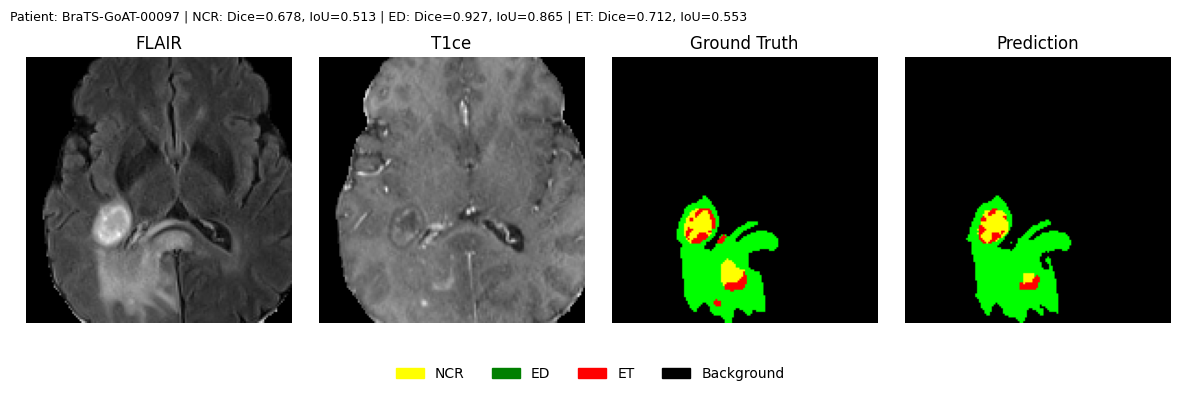

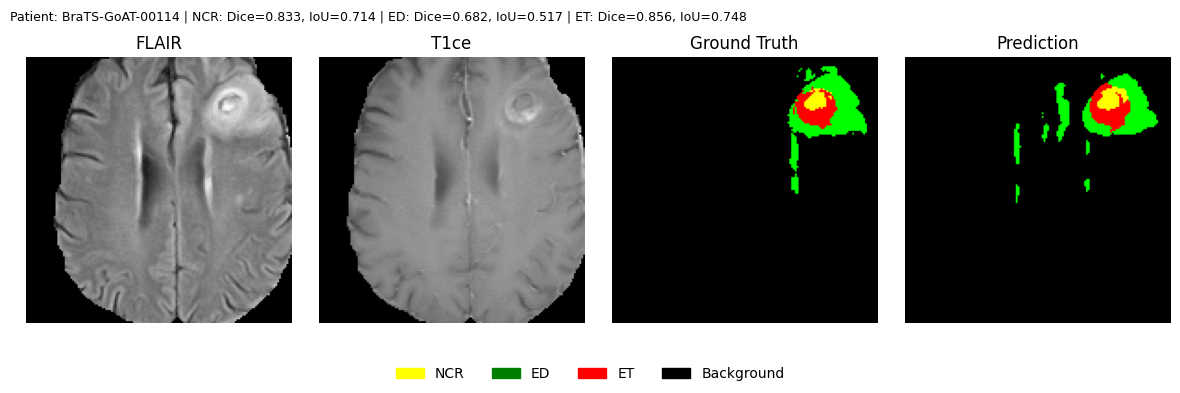

In [ ]:
# Show 3 unique patients from test set
visualize_unique_patients(h5_file, test_idx, model, n_patients=10)


## Overlay Predicted Segmentation Mask using FLAIR Modality along with Error Map

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# BraTS colors
brats_colors = {
    1: (1, 1, 0),   # NCR - yellow
    2: (0, 1, 0),   # ED - green
    3: (1, 0, 0),   # ET - red
}

def overlay_mask_on_mri(mri_slice, mask, alpha=0.4):
    """Overlay segmentation mask on grayscale MRI slice."""
    base = np.stack([mri_slice]*3, axis=-1)  # gray to RGB
    overlay = base.copy()

    for cls, color in brats_colors.items():
        overlay[mask == cls] = np.array(color)

    return (1-alpha)*base + alpha*overlay

def compute_error_map(gt_mask, pred_mask):
    """
    Error map:
      TP = white, FN = red, FP = blue
    """
    error_map = np.zeros((*gt_mask.shape, 3), dtype=np.float32)

    tp = (gt_mask > 0) & (pred_mask > 0)
    fn = (gt_mask > 0) & (pred_mask == 0)
    fp = (gt_mask == 0) & (pred_mask > 0)

    error_map[tp] = (1, 1, 1)   # white
    error_map[fn] = (1, 0, 0)   # red
    error_map[fp] = (0, 0, 1)   # blue

    return error_map

def visualize_overlays_with_errors(h5_file, test_idx, model, n_patients=3):
    """
    Show qualitative results: [FLAIR | GT overlay | Prediction overlay | Error map]
    for unique patients from test_idx.
    """
    brain_names = [name.decode("utf-8") for name in h5_file["brain_names"][:]]
    shown = 0

    for pid in test_idx:
        vol = h5_file["data"][pid]   # [X,Y,Z,C]
        gt  = h5_file["truth"][pid]  # [X,Y,Z]
        patient_name = brain_names[pid]

        # Pick slice with most tumor
        tumor_sums = np.sum(gt > 0, axis=(0,1))
        slice_idx = np.argmax(tumor_sums)

        flair = vol[:,:,slice_idx,0]
        gt_mask = gt[:,:,slice_idx]

        # Normalize & rotate
        flair_disp = (flair - flair.min())/(flair.max()-flair.min()+1e-8)
        flair_disp = np.rot90(flair_disp, k=3)
        gt_mask    = np.rot90(gt_mask,    k=3)

        # Predict
        inp = vol[:,:,slice_idx,:]
        inp = normalize_like_generator(inp)  # reuse your generator norm
        pred = model.predict(np.expand_dims(inp,0), verbose=0)
        pred_mask = np.argmax(pred[0], axis=-1)
        pred_mask = np.rot90(pred_mask, k=3)

        # Overlays
        gt_overlay   = overlay_mask_on_mri(flair_disp, gt_mask, alpha=0.4)
        pred_overlay = overlay_mask_on_mri(flair_disp, pred_mask, alpha=0.4)
        error_map    = compute_error_map(gt_mask, pred_mask)

        # Plot row
        fig, axs = plt.subplots(1,4, figsize=(10,4))
        axs[0].imshow(flair_disp, cmap="gray"); axs[0].set_title("FLAIR")
        axs[1].imshow(gt_overlay); axs[1].set_title("GT Overlay")
        axs[2].imshow(pred_overlay); axs[2].set_title("Prediction Overlay")
        axs[3].imshow(error_map); axs[3].set_title("Error Map")

        for a in axs: a.axis("off")

        # Row caption with Patient ID
        fig.text(0.01, 0.98, f"Patient: {patient_name}",
                 ha="left", va="top", fontsize=9)

        # Legend (bottom-centered)
        legend_elements = [
            mpatches.Patch(color='yellow', label='NCR'),
            mpatches.Patch(color='green',  label='ED'),
            mpatches.Patch(color='red',    label='ET'),
            mpatches.Patch(color='white',  label='TP'),
            mpatches.Patch(color='blue',   label='FP'),
            mpatches.Patch(color='red',    label='FN'),
        ]
        fig.legend(handles=legend_elements, loc='lower center',
                   ncol=6, frameon=False)

        plt.tight_layout(pad=2.0)
        plt.show()

        shown += 1
        if shown >= n_patients:
            break


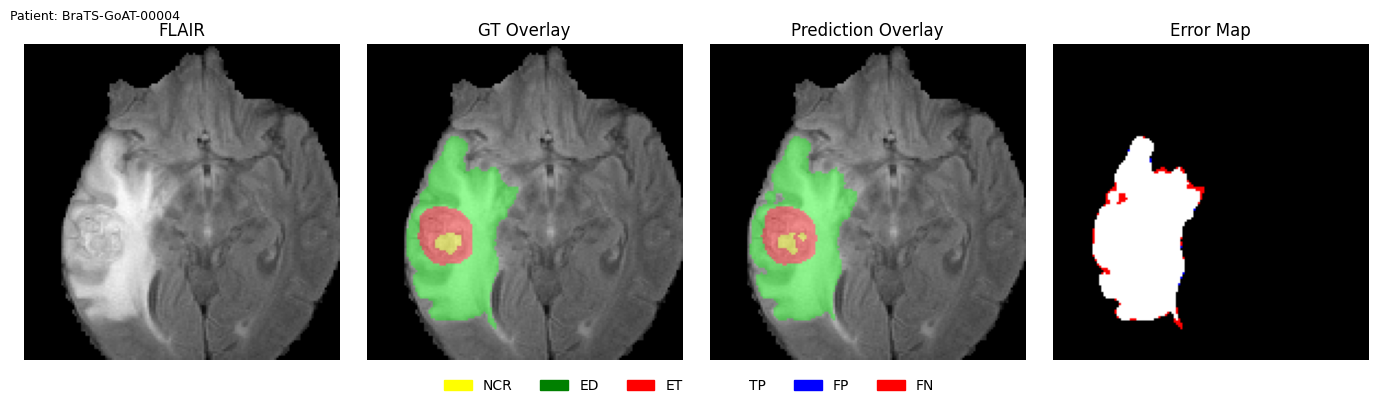

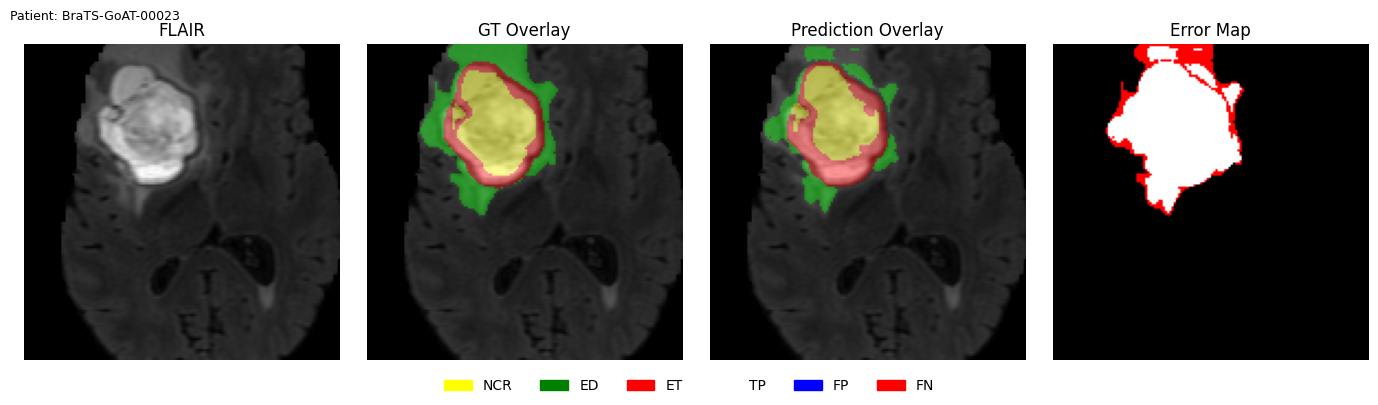

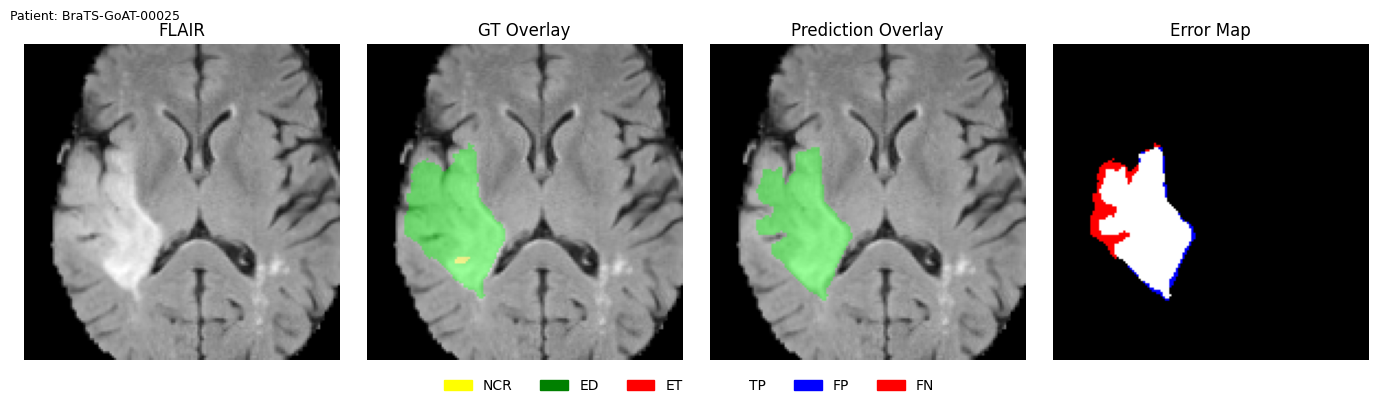

In [ ]:
# Show 3 patients with overlays + error maps
visualize_overlays_with_errors(h5_file, test_idx, model, n_patients=3)
